In [3]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize, differential_evolution
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import prim
from evolutionary_search import EvolutionaryAlgorithmSearchCV



# SCIPY OPTIMIZE MINIMIZE  ok for common regression functions, SVM, MLP, not ok for decision tree based models

In [4]:
def predict_min(_fitted_model,_x0,_variable_features,_deviation):
    def model(Xin):
        X=[Xin]
        return _fitted_model.predict(X)
    #test if fitted_model is regression modeling
    buf = "%s\n" % _fitted_model
    if "egress" in buf :
        if "ogistic" in buf :
            return "LogisticRegression - Not a regression model"
        else:
            #build bnds based on x0, variable_features  and deviation
            bnds=[];
            count=0
            for i in _x0.keys():
                if i in _variable_features:
                    bound_min=_x0[i]-(_x0[i]*_deviation)
                    bound_max=_x0[i]+(_x0[i]*_deviation)
                    bnds.insert(count,(bound_min,bound_max))
                    count+=1
                else:
                    bnds.insert(count,(_x0[i],_x0[i]))
                    count+=1
            result = minimize(model,_x0, method='L-BFGS-B',bounds=bnds)
            dfx0 = _x0.to_frame()
            
            dfx0.rename(columns={ dfx0.columns[0]: "x0" },inplace=True)
            dfx0['x0_max']=result.x
            dfx0['delta'] = dfx0.apply(lambda x: x['x0_max']-x['x0'], axis=1 )   
            return(result.fun,dfx0)
    else:
        return "Not a regression model"

In [5]:
def predict_max(_fitted_model,_x0,_variable_features,_deviation): 
    def model(Xin):
        X=[Xin]
        #print(X)
        return -1*_fitted_model.predict(X)
    #test if fitted_model is regression modeling
    buf = "%s\n" % _fitted_model
    if "egress" in buf or "SVR" in buf:
        if "ogistic" in buf :
            return "LogisticRegression - Not a regression model"
        else:
            #build bnds based on x0, variable_features  and deviation
            bnds=[];
            count=0
            for i in _x0.keys():
                if i in _variable_features:
                    bound_min=_x0[i]-(_x0[i]*_deviation)
                    bound_max=_x0[i]+(_x0[i]*_deviation)
                    bnds.insert(count,(bound_min,bound_max))
                    count+=1
                else:
                    bnds.insert(count,(_x0[i],_x0[i]))
                    count+=1
            #print(bnds)
            result = minimize(model,_x0, method='L-BFGS-B',bounds=bnds)
            dfx0 = _x0.to_frame()
            
            dfx0.rename(columns={ dfx0.columns[0]: "x0" },inplace=True)
            dfx0['x0_max']=result.x
            dfx0['delta'] = dfx0.apply(lambda x: x['x0_max']-x['x0'], axis=1 )   
            return(-1*result.fun,dfx0)
    else:
        return "Not a regression model"


In [ ]:
from evolutionary_search import EvolutionaryAlgorithmSearchCV
def predict_max_evol(_fitted_model,_x0,_variable_features,_deviation): 
    def model(Xin):
        X=[Xin]
        #print(X)
        return -1*_fitted_model.predict(X)
    #test if fitted_model is regression modeling
    buf = "%s\n" % _fitted_model
    if "egress" in buf or "SVR" in buf:
        if "ogistic" in buf :
            return "LogisticRegression - Not a regression model"
        else:
            #build bnds based on x0, variable_features  and deviation
            bnds=[];
            count=0
            for i in _x0.keys():
                if i in _variable_features:
                    bound_min=_x0[i]-(_x0[i]*_deviation)
                    bound_max=_x0[i]+(_x0[i]*_deviation)
                    bnds.insert(count,(bound_min,bound_max))
                    count+=1
                else:
                    bnds.insert(count,(_x0[i],_x0[i]))
                    count+=1
            #print(bnds)
            result = differential_evolution(model,bounds=bnds)
            #print(result)
            dfx0 = _x0.to_frame()
            
            dfx0.rename(columns={ dfx0.columns[0]: "x0" },inplace=True)
            dfx0['x0_max']=result.x
            dfx0['delta'] = dfx0.apply(lambda x: x['x0_max']-x['x0'], axis=1 )   
            return([-1*result.fun],dfx0)
    else:
        return "Not a regression model"


In [ ]:
# Test naïf sur données réelles / optimisation du prix moyen d'une maison en fonction de paramètres variables compréhensibles
# variables variables=('CRIM', 'NOX')  taux de criminalités et taux de pollution si augmentent => prix descend

In [ ]:
df = pd.read_csv('train_numeric.csv')
df['Response'].describe()

In [ ]:


boston = load_boston()
bos=pd.DataFrame(boston.data)
bos.columns=boston.feature_names
bos['MEDV']=boston.target
bos.head()

In [ ]:
print(boston.DESCR)

In [ ]:

lm= LinearRegression()
X=bos.drop('MEDV',axis=1)

In [ ]:
lm.fit(X, bos.MEDV)

In [ ]:
bos['MEDV'].iloc[480]

In [ ]:
x0=bos.drop('MEDV',axis=1).iloc[480]

In [ ]:
lm.predict([x0])

In [ ]:
variables=('CRIM', 'NOX')

In [ ]:
predict_min(lm,x0,variables,0.10)

In [ ]:
predict_max(lm,x0,variables,0.10)

In [ ]:
#
# Test sur un cas de régression et génération de 3 time-series 
#

In [6]:
# Generate fetures, outputs, and true coefficient of 100 samples,
features, output, coef = make_regression(n_samples = 10000,
                                         # three features
                                         n_features = 3,
                                         # where only two features are useful,
                                         n_informative = 3,
                                         # a single target value per observation
                                         n_targets = 1,
                                         # 0.0 standard deviation of the guassian noise
                                         noise = 0.1,
                                         # show the true coefficient used to generated the data
                                         coef = True)

In [7]:
x = np.linspace(0, 10000, 10000)

In [8]:
y=np.sin(x)*10+25


In [9]:
df=pd.DataFrame(features, columns=['Capteur1', 'Capteur2', 'Capteur3'])
df['yield']=output/output.mean()+y

In [10]:
df = pd.rolling_mean(df, window=100)

C:\Users\pv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=100,center=False).mean()
  """Entry point for launching an IPython kernel.


In [11]:
df['Capteur1']*=20
df['Capteur2']*=20
df['Capteur3']*=25

In [12]:
df['Capteur1']+=20
df['Capteur2']+=50
df['Capteur3']+=25

In [13]:
df['yield']=(df['yield']/df['yield'].max())*5+70

In [14]:
df.describe()

,Capteur1,Capteur2,Capteur3,yield
count,9901.000000,9901.000000,9901.000000,9901.000000
mean,19.843848,49.897133,24.553075,73.163947
std,1.846697,1.843186,2.501576,0.635268
min,13.347295,44.150245,17.559819,71.417198
25%,18.587655,48.598585,22.815064,72.716605
50%,19.920365,49.856302,24.536755,73.187927
75%,21.087377,51.269608,26.212407,73.594337
max,26.344352,55.308653,32.164773,75.000000


In [ ]:
#Determing rolling statistics
#rolmean = pd.rolling_mean(df, window=100)
#rolstd = pd.rolling_std(df, window=12)

In [ ]:
#rolmeancapt1 = pd.rolling_mean(df['Capteur1'], window=200)

In [ ]:
#df['Capteur1']=rolmeancapt1

Capteur1


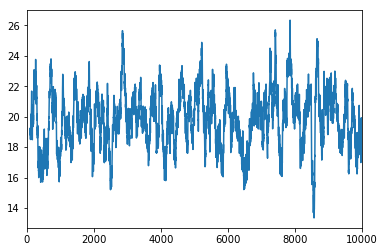

Capteur2


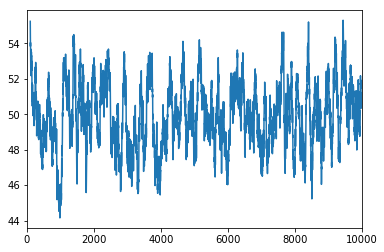

Capteur3


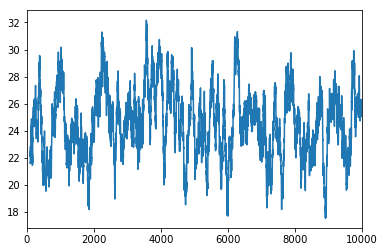

yield


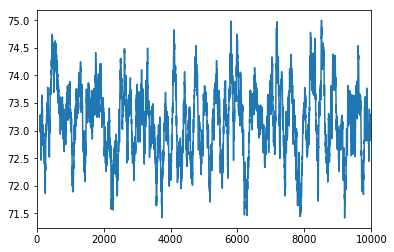

In [15]:
for i in df.columns:
    print(i)
    dfplot=df[i].copy()  #00001483_s01_a01 #00000177_s01_a00 - 357_s01_a00#00000177_s01_a00
        #dfplot.cumsum()

    plt.figure(); 
    dfplot.plot();
    plt.show()

In [14]:
import csv
df[100:10000].to_csv('export_data_regression_3feats_1yield£_10000points_2.csv')

In [16]:


X_train=df[100:5000].drop('yield',axis=1).values
X_test=df[5000:].drop('yield',axis=1).values
y_train=df['yield'][100:5000].values 
y_test =df['yield'][5000:].values


import xgboost as xgb

gbm = xgb.XGBRegressor(max_depth=5, n_estimators=500, learning_rate=0.05).fit(X_train, y_train)
    
predictions=gbm.predict(X_test)
score=gbm.score(X_test, y_test)
print(score)

dfres=df[5000:].copy()
dfres['predict']=predictions

C:\Users\pv\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.992626534125


In [53]:
lm= LinearRegression().fit(X_train, y_train)

score=lm.score(X_test, y_test)
print(score)

0.999950443447


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
    
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls').fit(X_train, y_train)

In [17]:
from sklearn import svm

clf = svm.SVR().fit(X_train, y_train)

In [ ]:
#concatenate single result to series

import numpy as np

s1 = pd.Series([])
for i in X_test:
    predictions=clf.predict([i])
    s1=pd.Series(np.concatenate((s1.values, predictions)))
#print(s1)   


In [18]:
predictions=clf.predict(X_test)
score=clf.score(X_test, y_test)
print(score)

dfres['predictsvr']=predictions

0.816392032461


In [17]:
from sklearn.neural_network import MLPRegressor

#MLPRegressor(solver='sgd', activation='relu',learning_rate_init=0.01,random_state=1).fit(X_train, y_train)
mlp = MLPRegressor(hidden_layer_sizes = [20,20],activation = 'relu',alpha =2.0,solver = 'lbfgs').fit(X_train, y_train)
score=mlp.score(X_test, y_test)
print(score)

-0.146366798661


In [54]:
variables=('Capteur2', 'Capteur3')
#for i in X_test:
    #predictions=gbm.predict([i])
s1 = pd.Series([])
s2 = pd.Series([])
s3 = pd.Series([])
s4 = pd.Series([])
optim_activate=False
newvalue=False
prevcapt1=0
for i in range(0,X_test.shape[0]):
    if i > 500:
        optim_activate=True
    x0=df.drop('yield',axis=1).iloc[5000+i]
    if prevcapt1>0:
        x0['Capteur1']=(x0['Capteur1']+prevcapt1)/2
    if newvalue==True:
        x0['Capteur2']=newcapt2
        x0['Capteur3']=newcapt3
    s2=pd.Series(np.concatenate((s2.values, pd.Series(x0['Capteur2']))))
    s3=pd.Series(np.concatenate((s3.values, pd.Series(x0['Capteur3']))))
    #print(x0)
    predictions=lm.predict(x0.values.reshape(1, -1))
    if optim_activate==True:
        predictions,dfbest=predict_max(lm,x0,variables,0.1)
        #print(predictions)
        if dfbest['x0_max']['Capteur2'] <60 and dfbest['x0_max']['Capteur2'] >35:
            newcapt2=dfbest['x0_max']['Capteur2']
            newvalue=True
        if dfbest['x0_max']['Capteur3'] <39 and dfbest['x0_max']['Capteur3'] >15:
            newcapt3=dfbest['x0_max']['Capteur3']
            newvalue=True
    #prevcapt1=x0['Capteur1']
    s4=pd.Series(np.concatenate((s4.values, pd.Series(x0['Capteur1']))))
    #print("**",predictions)
    s1=pd.Series(np.concatenate((s1.values, predictions)))
    
print(s1)   




0       73.476998
1       73.399000
2       73.378940
3       73.280853
4       73.301642
5       73.321898
6       73.325066
7       73.400014
8       73.502442
9       73.440236
10      73.433477
11      73.381880
12      73.482719
13      73.544813
14      73.427918
15      73.528450
16      73.657489
17      73.806021
18      73.798381
19      73.653356
20      73.698436
21      73.563195
22      73.540215
23      73.680594
24      73.751912
25      73.711704
26      73.793901
27      73.799507
28      73.730236
29      73.619156
          ...    
4970    77.871019
4971    77.882675
4972    77.910952
4973    77.887376
4974    77.858668
4975    77.864597
4976    77.840389
4977    77.737653
4978    77.721581
4979    77.725920
4980    77.713830
4981    77.637238
4982    77.615417
4983    77.562954
4984    77.571231
4985    77.462087
4986    77.509576
4987    77.560172
4988    77.626912
4989    77.639509
4990    77.726238
4991    77.719736
4992    77.761264
4993    77.691426
4994    77

In [29]:
buf = "%s\n" % gbm
print(gbm)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.05, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=500, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)


In [55]:
dfres['predictoptim']=s1.values
dfres['New_capt2']=s2.values
dfres['New_capt3']=s3.values
dfres['New_capt4']=s4.values

In [56]:
dfres

,Capteur1,Capteur2,Capteur3,yield,predict,predictoptim,New_capt2,New_capt3,New_capt4
5000,19.499072,47.839635,24.726962,73.478662,73.479919,73.476998,47.839635,24.726962,19.499072
5001,19.805351,47.888457,24.856352,73.394855,73.391769,73.399000,47.888457,24.856352,19.805351
5002,20.332703,47.310522,24.973236,73.373430,73.368134,73.378940,47.310522,24.973236,20.332703
5003,20.413291,47.725738,25.114910,73.279618,73.260597,73.280853,47.725738,25.114910,20.413291
5004,20.568194,47.376469,25.143383,73.306559,73.302711,73.301642,47.376469,25.143383,20.568194
5005,20.530065,47.358790,25.079957,73.329051,73.339806,73.321898,47.358790,25.079957,20.530065
5006,20.416058,47.702884,24.894725,73.328478,73.311333,73.325066,47.702884,24.894725,20.416058
5007,20.516953,47.270385,24.741954,73.397107,73.396393,73.400014,47.270385,24.741954,20.516953
5008,20.632881,47.221339,24.139984,73.496374,73.505806,73.502442,47.221339,24.139984,20.632881
5009,20.950362,47.270547,24.175953,73.437253,73.423393,73.440236,47.270547,24.175953,20.950362


Capteur1


<IPython.core.display.Javascript object>


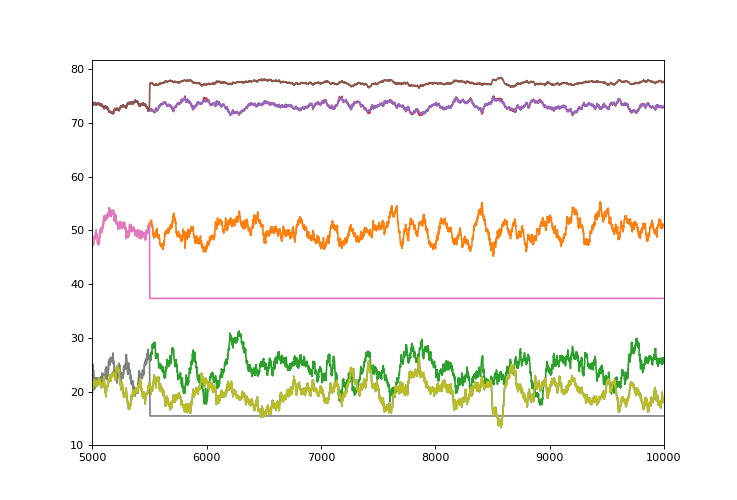

Capteur2
Capteur3
yield
predict
predictoptim
New_capt2
New_capt3
New_capt4


In [57]:
%matplotlib notebook
#%matplotlib inline
import matplotlib.pyplot as plt

for i in dfres.columns:
    print(i)
    dfplot=dfres[i].copy()  #00001483_s01_a01 #00000177_s01_a00 - 357_s01_a00#00000177_s01_a00
        #dfplot.cumsum()

    #plt.figure(); 
    dfplot.plot().set_xlim(5000, 10000);

    plt.show()

In [ ]:
#
# Test sur un cas de régression et génération de 5 time-series 
#

In [5]:
# Generate fetures, outputs, and true coefficient of 100 samples,
features, output, coef = make_regression(n_samples = 10000,
                                         # three features
                                         n_features = 5,
                                         # where only two features are useful,
                                         n_informative = 5,
                                         # a single target value per observation
                                         n_targets = 1,
                                         # 0.0 standard deviation of the guassian noise
                                         noise = 0.1,
                                         # show the true coefficient used to generated the data
                                         coef = True)

In [6]:
x = np.linspace(0, 10000, 10000)
y=np.sin(x)*10+25
df=pd.DataFrame(features, columns=['Capteur1', 'Capteur2', 'Capteur3', 'Capteur4', 'Capteur5'])
df['yield']=output/output.mean()+y
df = pd.rolling_mean(df, window=100)

df['Capteur1']*=10
df['Capteur2']*=10
df['Capteur3']*=15
df['Capteur4']*=10
df['Capteur5']*=15

df['Capteur1']+=10
df['Capteur2']+=20
df['Capteur3']+=35
df['Capteur4']+=50
df['Capteur5']+=65

df['yield']=(df['yield']/df['yield'].max())*15+100

C:\Users\pv\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=100,center=False).mean()
  """


In [7]:
df.describe()

,Capteur1,Capteur2,Capteur3,Capteur4,Capteur5,yield
count,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000
mean,9.896791,19.782215,34.969667,49.995287,65.323564,104.683978
std,1.006536,1.019293,1.511486,1.062305,1.315603,3.520661
min,6.466563,17.069213,28.341505,46.726457,61.337565,93.798065
25%,9.283565,19.090607,34.066149,49.303993,64.420317,102.252214
50%,9.886578,19.745237,35.043634,50.007301,65.356828,104.397880
75%,10.491625,20.435558,35.980793,50.693466,66.239156,106.904107
max,13.486808,23.495224,39.110223,53.561616,69.967677,115.000000


Capteur1


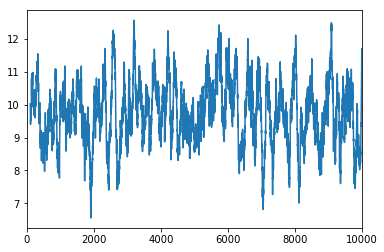

Capteur2


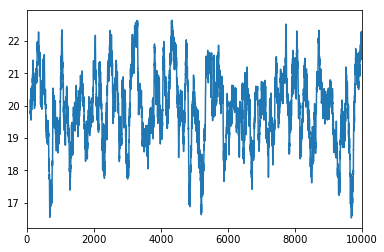

Capteur3


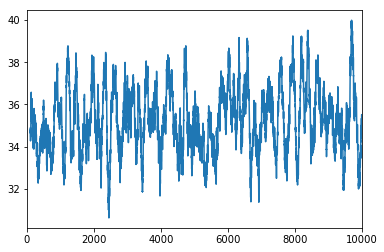

Capteur4


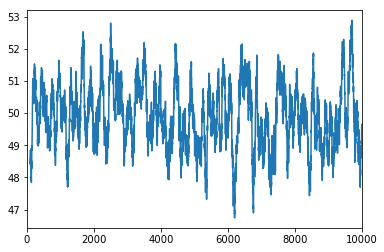

Capteur5


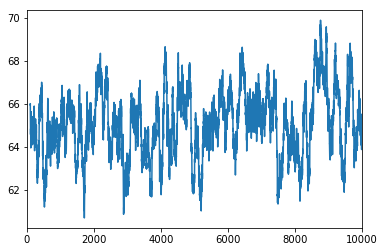

yield


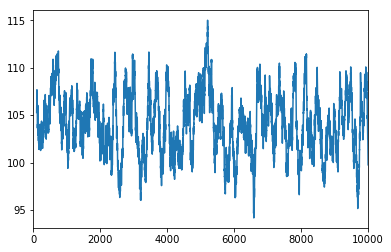

In [7]:
for i in df.columns:
    print(i)
    dfplot=df[i].copy()  #00001483_s01_a01 #00000177_s01_a00 - 357_s01_a00#00000177_s01_a00
        #dfplot.cumsum()

    plt.figure(); 
    dfplot.plot();
    plt.show()

In [4]:
import csv
df[100:10000].to_csv('export_data_regression_5feats_1yield_10000points_shifted_activation.csv')

NameError: name 'df' is not defined

In [8]:
X_train=df[100:5000].drop('yield',axis=1).values
X_test=df[5000:].drop('yield',axis=1).values
y_train=df['yield'][100:5000].values 
y_test =df['yield'][5000:].values


import xgboost as xgb

gbm = xgb.XGBRegressor(max_depth=5, n_estimators=500, learning_rate=0.05).fit(X_train, y_train)
    
predictions=gbm.predict(X_test)
score=gbm.score(X_test, y_test)
print(score)

dfres=df[5000:].copy()
dfres['predict']=predictions

C:\Users\pv\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.957361559489


In [9]:
lm= LinearRegression().fit(X_train, y_train)

score=lm.score(X_test, y_test)
print(score)

0.999996188983


In [10]:
from sklearn import svm

clf = svm.SVR().fit(X_train, y_train)
predictions=clf.predict(X_test)
score=clf.score(X_test, y_test)
print(score)

dfres['predictsvr']=predictions

0.908095527364


In [11]:
from sklearn.neural_network import MLPRegressor

#MLPRegressor(solver='sgd', activation='relu',learning_rate_init=0.01,random_state=1).fit(X_train, y_train)
mlp = MLPRegressor(hidden_layer_sizes = [20,20],activation = 'relu',alpha =2.0,solver = 'lbfgs').fit(X_train, y_train)
score=mlp.score(X_test, y_test)
print(score)

-0.681286396199


Capteur1


<IPython.core.display.Javascript object>


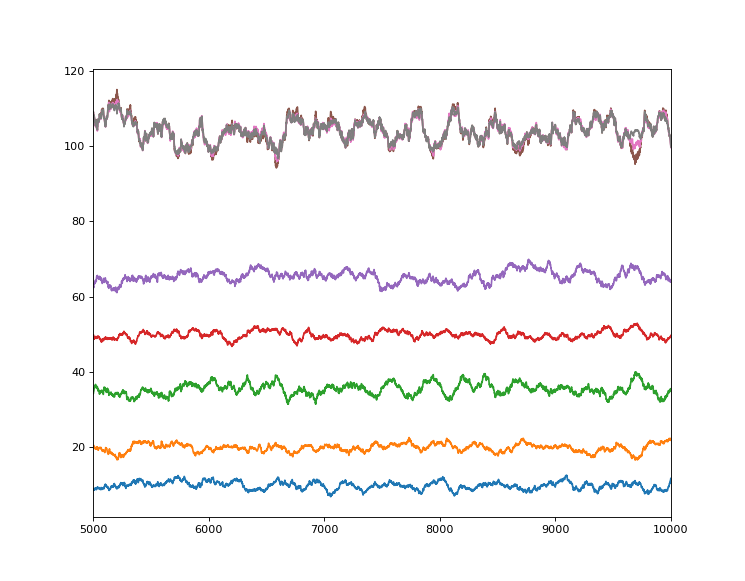

Capteur2
Capteur3
Capteur4
Capteur5
yield
predict
predictsvr


In [12]:
%matplotlib notebook
#%matplotlib inline
import matplotlib.pyplot as plt

for i in dfres.columns:
    print(i)
    dfplot=dfres[i].copy()  #00001483_s01_a01 #00000177_s01_a00 - 357_s01_a00#00000177_s01_a00
        #dfplot.cumsum()

    #plt.figure(); 
    dfplot.plot().set_xlim(5000, 10000);

    plt.show()

In [13]:
variables=('Capteur2', 'Capteur3')
#for i in X_test:
    #predictions=gbm.predict([i])
s1 = pd.Series([])
s2 = pd.Series([])
s3 = pd.Series([])
s4 = pd.Series([])
optim_activate=False
newvalue2=False
newvalue3=False
prevcapt1=0
for i in range(0,X_test.shape[0]):
    if i > 500:
        optim_activate=True
    x0=df.drop('yield',axis=1).iloc[5000+i]
    if prevcapt1>0:
        x0['Capteur1']=x0['Capteur1']+(x0['Capteur1']-prevcapt1)/2
    if newvalue2==True:
        x0['Capteur2']=newcapt2
        #newvalue2=False
    if newvalue3==True:
        x0['Capteur3']=newcapt3
        #newvalue3=False
    s2=pd.Series(np.concatenate((s2.values, pd.Series(x0['Capteur2']))))
    s3=pd.Series(np.concatenate((s3.values, pd.Series(x0['Capteur3']))))
    #print(x0)
    predictions=lm.predict(x0.values.reshape(1, -1))
    if optim_activate==True:
        predictions,dfbest=predict_max(lm,x0,variables,0.05)
        if dfbest['x0_max']['Capteur2'] <25 and dfbest['x0_max']['Capteur2'] >15:
            newcapt2=dfbest['x0_max']['Capteur2']
            newvalue2=True
        if dfbest['x0_max']['Capteur3'] <40 and dfbest['x0_max']['Capteur3'] >30:
            newcapt3=dfbest['x0_max']['Capteur3']
            newvalue3=True
    prevcapt1=x0['Capteur1']
    s4=pd.Series(np.concatenate((s4.values, pd.Series(x0['Capteur1']))))
    s1=pd.Series(np.concatenate((s1.values, predictions)))
    
print(s1)   


0       109.069524
1       109.184925
2       108.490862
3       107.930300
4       108.279927
5       108.209630
6       107.841897
7       107.826771
8       107.521735
9       108.120464
10      107.476993
11      107.359619
12      106.769977
13      106.560989
14      106.465935
15      106.357059
16      106.774421
17      105.836300
18      105.943570
19      105.668651
20      105.444056
21      105.674484
22      106.067980
23      105.706628
24      106.262570
25      106.208636
26      107.286587
27      106.392127
28      105.585014
29      104.710760
           ...    
4970    120.951330
4971    120.329382
4972    120.480922
4973    120.436864
4974    120.415908
4975    120.226696
4976    120.439003
4977    120.785947
4978    120.911574
4979    120.141034
4980    119.761427
4981    120.168481
4982    119.713862
4983    119.661659
4984    119.255614
4985    119.004081
4986    118.896028
4987    118.846666
4988    119.115890
4989    118.736504
4990    119.119042
4991    118.

In [14]:
dfres['predictoptim']=s1.values
dfres['New_capt2']=s2.values
dfres['New_capt3']=s3.values
dfres['New_capt4']=s4.values

Capteur1


<IPython.core.display.Javascript object>


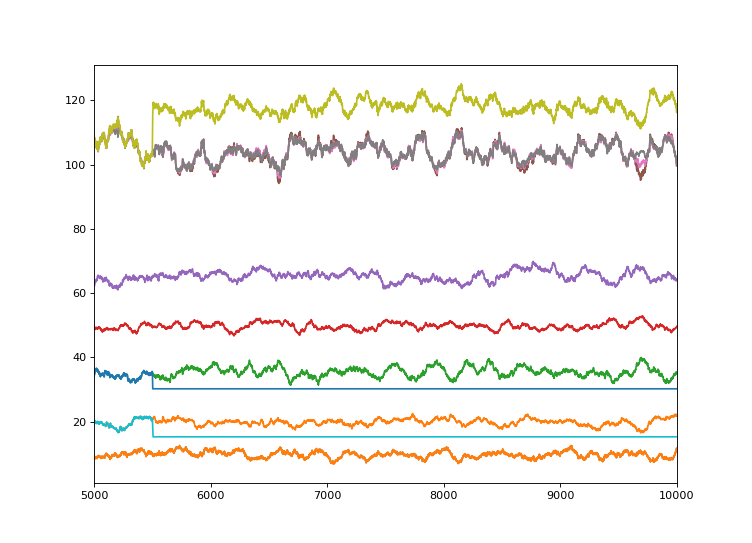

Capteur2
Capteur3
Capteur4
Capteur5
yield
predict
predictsvr
predictoptim
New_capt2
New_capt3
New_capt4


In [15]:
%matplotlib notebook
#%matplotlib inline
import matplotlib.pyplot as plt

for i in dfres.columns:
    print(i)
    dfplot=dfres[i].copy()  #00001483_s01_a01 #00000177_s01_a00 - 357_s01_a00#00000177_s01_a00
        #dfplot.cumsum()

    #plt.figure(); 
    dfplot.plot().set_xlim(5000, 10000);

    plt.show()

In [75]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot

count=0
for i in dfres.columns:
    if count <1:
        print(i)
        autocorrelation_plot(dfres[i])

        pyplot.show()
    count+=1

Capteur1


In [25]:
df[100:5000].drop("yield",axis=1).head()

,Capteur1,Capteur2,Capteur3,Capteur4,Capteur5
100,9.433322,23.124128,36.341615,49.979066,63.657192
101,9.558315,22.939846,36.163308,49.819085,63.620410
102,9.735685,23.072806,36.040303,50.003586,63.563005
103,10.037337,23.023279,36.137082,50.035367,63.443457
104,9.800252,22.777737,36.430828,50.341905,63.375294


<IPython.core.display.Javascript object>


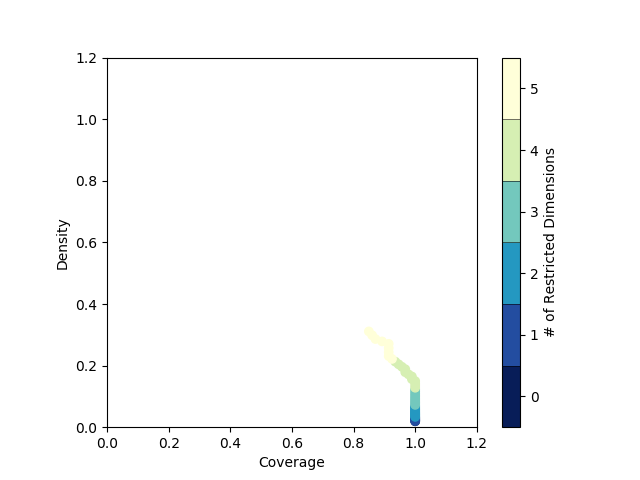

In [68]:
%matplotlib notebook
p = prim.Prim(df[100:5000].drop("yield",axis=1), df[100:5000]["yield"], threshold=112, threshold_type=">")
    
box = p.find_box()
box.show_tradeoff()
    
plt.show()

<IPython.core.display.Javascript object>


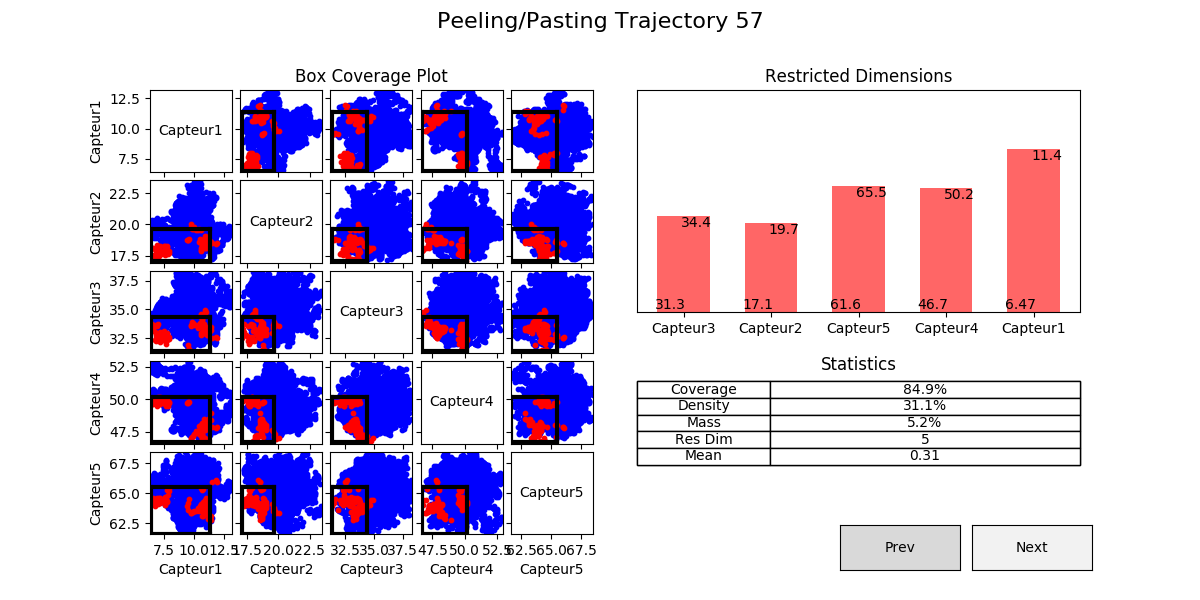

<IPython.core.display.Javascript object>


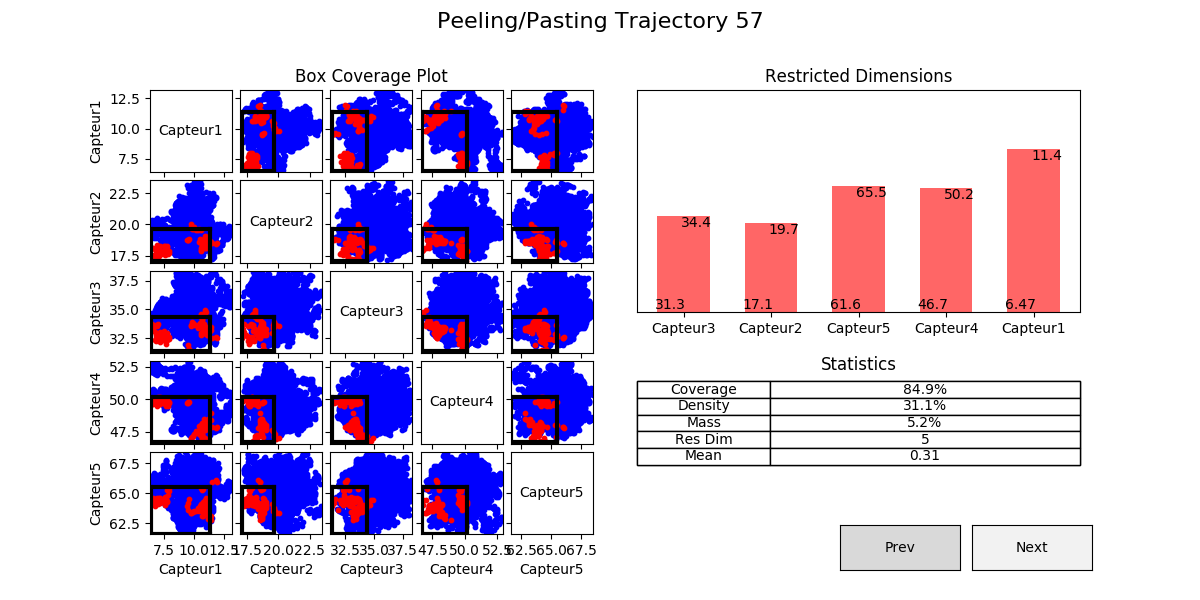

In [69]:
box.show_details()

In [70]:
variables=('Capteur2', 'Capteur3')
#for i in X_test:
    #predictions=gbm.predict([i])
s1 = pd.Series([])
s2 = pd.Series([])
s3 = pd.Series([])
s4 = pd.Series([])
s5 = pd.Series([])
s11 = pd.Series([])
optim_activate=False
newvalue2=False
newvalue3=False
prevcapt1=0

for i in range(0,X_test.shape[0]):
    if i > 500:
        optim_activate=True
    x0=df.drop('yield',axis=1).iloc[5000+i]

    
    if optim_activate==True:
        #predictions,dfbest=predict_max(lm,x0,variables,0.2)

        if x0['Capteur2'] >19 or x0['Capteur2'] <17:
            x0['Capteur2']=prevcapt2        
        else:
            prevcapt2=x0['Capteur2']
        if x0['Capteur3'] >34 or x0['Capteur3'] <32:
            x0['Capteur3']=prevcapt3       
        else:
            prevcapt3=x0['Capteur3']    
        if x0['Capteur4'] >50 or x0['Capteur4'] <47:
            x0['Capteur4']=prevcapt4        
        else:
            prevcapt4=x0['Capteur4']
        if x0['Capteur1'] >11 or x0['Capteur1'] <7:
            x0['Capteur1']=prevcapt1        
        else:
            prevcapt1=x0['Capteur1']
        if x0['Capteur5'] >65 or x0['Capteur5'] <61:
            x0['Capteur5']=prevcapt5        
        else:
            prevcapt5=x0['Capteur5']
            
    prevcapt1=x0['Capteur1']             
    prevcapt2=x0['Capteur2']    
    prevcapt3=x0['Capteur3']  
    prevcapt4=x0['Capteur4'] 
    prevcapt5=x0['Capteur5'] 
    
    s2=pd.Series(np.concatenate((s2.values, pd.Series(x0['Capteur2']))))
    s3=pd.Series(np.concatenate((s3.values, pd.Series(x0['Capteur3']))))
    s4=pd.Series(np.concatenate((s4.values, pd.Series(x0['Capteur4']))))
    s11=pd.Series(np.concatenate((s11.values, pd.Series(x0['Capteur1']))))
    s5=pd.Series(np.concatenate((s5.values, pd.Series(x0['Capteur5']))))

    predictions=lm.predict(x0.values.reshape(1, -1))
    s1=pd.Series(np.concatenate((s1.values, predictions)))
    
print(s1)   

0       111.957957
1       112.730463
2       111.740841
3       112.076205
4       112.085770
5       111.708102
6       112.342442
7       113.033840
8       113.526628
9       114.366765
10      113.420513
11      112.921157
12      113.406370
13      114.147554
14      113.846111
15      113.544546
16      113.618238
17      112.929193
18      112.647311
19      112.731821
20      112.548879
21      112.815565
22      112.821191
23      113.105282
24      113.200388
25      113.309413
26      113.097720
27      113.478852
28      114.162888
29      113.980435
           ...    
4970    111.486198
4971    111.282756
4972    111.066486
4973    111.320025
4974    110.868320
4975    111.157290
4976    111.286582
4977    111.129103
4978    111.095464
4979    111.396891
4980    111.243607
4981    111.294845
4982    111.314430
4983    111.291457
4984    111.485230
4985    111.224870
4986    111.117626
4987    111.248401
4988    111.317726
4989    111.365445
4990    111.058777
4991    111.

In [71]:
dfres['predictoptim']=s1.values
dfres['New_capt2']=s2.values
dfres['New_capt3']=s3.values
dfres['New_capt4']=s4.values
dfres['New_capt5']=s5.values
dfres['New_capt1']=s11.values


In [57]:
dfres.describe()

,Capteur1,Capteur2,Capteur3,Capteur4,Capteur5,yield,predict,predictsvr,predictoptim,New_capt2,New_capt3,New_capt4
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,9.887779,19.726304,34.857210,50.115308,65.312768,104.759065,104.726181,104.676749,104.759192,19.726304,34.857210,50.115308
std,0.989495,0.932217,1.680078,1.028519,1.315087,3.647354,3.383455,3.163072,3.646935,0.932217,1.680078,1.028519
min,7.386672,17.241131,28.341505,47.039652,61.337565,93.978663,96.572899,97.326404,93.980147,17.241131,28.341505,47.039652
25%,9.223412,19.107291,33.957623,49.472740,64.449965,102.246470,102.293171,102.358700,102.246474,19.107291,33.957623,49.472740
50%,9.814740,19.700916,34.971955,50.119887,65.251785,104.320866,104.378326,104.355992,104.322574,19.700916,34.971955,50.119887
75%,10.456994,20.364591,35.954423,50.743847,66.176636,106.983653,107.015789,106.358921,106.984047,20.364591,35.954423,50.743847
max,13.486808,22.797454,39.110223,53.561616,69.967677,114.555877,113.331757,112.939163,114.562524,22.797454,39.110223,53.561616


Capteur1


<IPython.core.display.Javascript object>


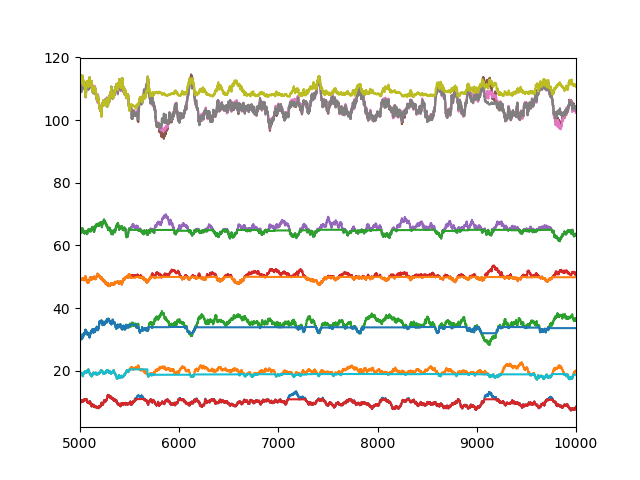

Capteur2
Capteur3
Capteur4
Capteur5
yield
predict
predictsvr
predictoptim
New_capt2
New_capt3
New_capt4
New_capt5
New_capt1


In [72]:
%matplotlib notebook
#%matplotlib inline
import matplotlib.pyplot as plt

for i in dfres.columns:
    print(i)
    dfplot=dfres[i].copy()  #00001483_s01_a01 #00000177_s01_a00 - 357_s01_a00#00000177_s01_a00
        #dfplot.cumsum()

    #plt.figure(); 
    dfplot.plot().set_xlim(5000, 10000);

    plt.show()